In [12]:
%load_ext autoreload
%autoreload 2

In [40]:
from pathlib import Path

DATA_DIR = Path("data")
assert DATA_DIR.exists()

DANES_ROOT = DATA_DIR / Path("imm_face_db")
IBUG_ROOT = DATA_DIR / Path("ibug_300W_large_face_landmark_dataset")
train_xml = Path("labels_ibug_300W_train.xml")
test_xml = Path("labels_ibug_300W_test_parsed.xml")

In [19]:
%%capture
if not IBUG_ROOT.exists():
    !wget https://people.eecs.berkeley.edu/~zhecao/ibug_300W_large_face_landmark_dataset.zip
    !unzip 'ibug_300W_large_face_landmark_dataset.zip'    
    !rm -r 'ibug_300W_large_face_landmark_dataset.zip'

In [ ]:
assert DANES_ROOT.exists()
assert IBUG_ROOT.exists()

# Part 1

In [13]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader

import cnn
from dataloader import NoseKeypointDataset, part1_augment
from display import *
from learn import test, train

In [21]:
# Initialite Datasets

# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = NoseKeypointDataset(
    idxs=np.arange(33), root_dir=DANES_ROOT, transform=part1_augment
)
assert len(training_set) == 192, len(training_set)

# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = NoseKeypointDataset(
    idxs=np.arange(32, 40), root_dir=DANES_ROOT, transform=part1_augment
)
assert len(validation_set) == 48

# Initialize Dataloaders
batch_size = 28
train_loader = DataLoader(training_set, batch_size, shuffle=True)
test_loader = DataLoader(validation_set, batch_size, shuffle=False)

In [ ]:
# show_keypoints(training_set[2][0], training_set[2][1])

In [ ]:
# show_keypoints(training_set[134][0], training_set[134][1])

In [ ]:
# Training and Testing

model = cnn.NoseFinder()
epochs = 18
learn_rate = 0.002
show_every = 1

loss_per_epoch = []
for ep in range(epochs):
    
    print(f"========== Start Epoch {ep} ==========")
    
    trained_model, train_loss = train(train_loader, model, learn_rate)
    _, valid_loss = test(test_loader, trained_model, show_every)

    loss_per_epoch.append([train_loss, valid_loss])
    print_epoch(ep, train_loss, valid_loss)

In [ ]:
# Plot training and validation loss progress

loss_per_epoch = np.array(loss_per_epoch)
show_progress(loss_per_epoch)

# Part 2

In [27]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader

import cnn
from dataloader import FaceKeypointsDataset, part2_augment
from display import *
from learn import test, train

In [28]:
# Initialite Datasets

# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = FaceKeypointsDataset(
    idxs=np.arange(33), root_dir=DANES_ROOT, transform=part2_augment
)
assert len(training_set) == 192

# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = FaceKeypointsDataset(
    idxs=np.arange(32, 40), root_dir=DANES_ROOT, transform=part2_augment
)
assert len(validation_set) == 48

# Initialize Dataloaders
batch_size = 25
train_loader = DataLoader(training_set, batch_size, shuffle=True)
test_loader = DataLoader(validation_set, batch_size, shuffle=False)

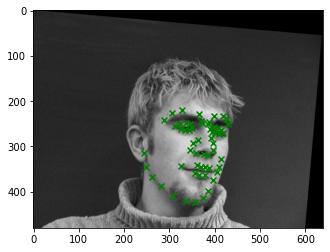

In [29]:
# Plotting a few input images and their face keypoints.

sample = training_set[3]
image, points = sample
show_keypoints(image, points)

In [2]:
# Training and Testing

model = cnn.FaceFinder()
epochs = 1
learn_rate = 0.001
show_every = 3

loss_per_epoch = []
for ep in range(epochs):

    print(f"========== Start Epoch {ep} ==========")

    trained_model, train_loss = train(train_loader, model, learn_rate)
    _, valid_loss = test(test_loader, trained_model, show_every)

    loss_per_epoch.append([train_loss, valid_loss])
    print_epoch(ep, train_loss, valid_loss)

========== Start Epoch 0 ==========


NameError: name 'train_loader' is not defined

IndexError: too many indices for array

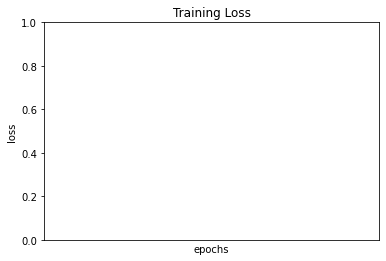

In [3]:
# Plot training and validation loss progress

loss_per_epoch = np.array(loss_per_epoch)
show_progress(loss_per_epoch)

# Part 3

In [41]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader

import cnn
from dataloader import LargeDataset
from display import *
from learn import test, train

In [44]:
# Initialite Datasets

training_set = LargeDataset(train_xml, root_dir=IBUG_ROOT)
assert len(training_set) == 6666
validation_set = LargeDataset(test_xml, root_dir=IBUG_ROOT)
assert len(validation_set) == 1008

# Initialize Dataloaders
batch_size = 250
train_loader = DataLoader(training_set, batch_size, shuffle=True)
test_loader = DataLoader(validation_set, batch_size, shuffle=False)

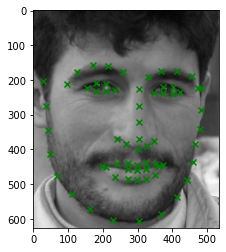

In [45]:
show_keypoints(training_set[2][0], training_set[2][1])

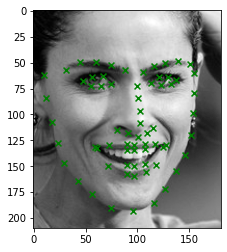

In [46]:
show_keypoints(training_set[134][0], training_set[134][1])

In [54]:
def ResNet():
    import torchvision.models as models
    model = models.resnet18()
#     print(model.parameters)
    return model

ResNet().layers

ModuleAttributeError: 'ResNet' object has no attribute 'layers'

In [47]:
# Training and Testing

model = cnn.ResNet()
epochs = 18
learn_rate = 0.002
show_every = 1

loss_per_epoch = []
for ep in range(epochs):

    print(f"========== Start Epoch {ep} ==========")

    trained_model, train_loss = train(train_loader, model, learn_rate)
    _, valid_loss = test(test_loader, trained_model, show_every)

    loss_per_epoch.append([train_loss, valid_loss])
    print_epoch(ep, train_loss, valid_loss)

========== Start Epoch 0 ==========


AssertionError: inf, 0.8742856979370117

In [ ]:
# Plot training and validation loss progress

loss_per_epoch = np.array(loss_per_epoch)
show_progress(loss_per_epoch)